<a href="https://colab.research.google.com/github/TejasreeL/Credit-Card-Default-Risk-Analysis/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement :  Can we use data and machine learning to predict who might miss credit card payments/loan/Mortgages, allowing banks to offer help (like lower rates or financial advice) and prevent defaults for both parties benefit.

This essentially turns credit risk analysis into a predictive game with the goal of helping both banks and borrowers

Solution :

*   Lower interest rates or smaller payments:
*   Making things easier financially.
Payment plans or debt consolidation: Helping them manage their debt better.
* Financial education: Teaching them better budgeting and spending habits.



**Importing Libraries and packages**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [ ]:
df = pd.read_excel("tips.xlsx", index_col=0)

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.shape

(30001, 24)

In [ ]:
df = df.iloc[1:].reset_index(drop=True)

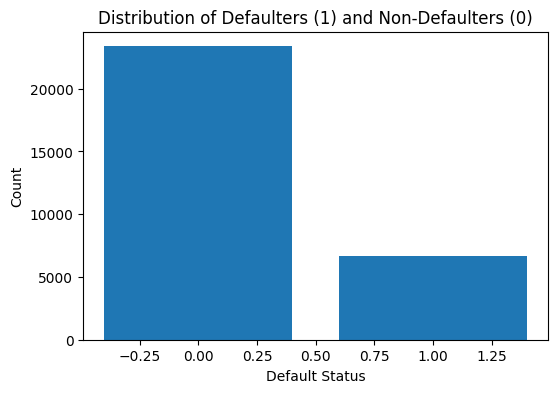

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(df['Y'].value_counts().index, df['Y'].value_counts())
plt.title('Distribution of Defaulters (1) and Non-Defaulters (0)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

In [ ]:
correlation_matrix = df.corr()

<ipython-input-113-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
# import seaborn as sns
# plt.figure(figsize=(14, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [ ]:

df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**Checking Whether Dataset contain any null Val.**

<Axes: >

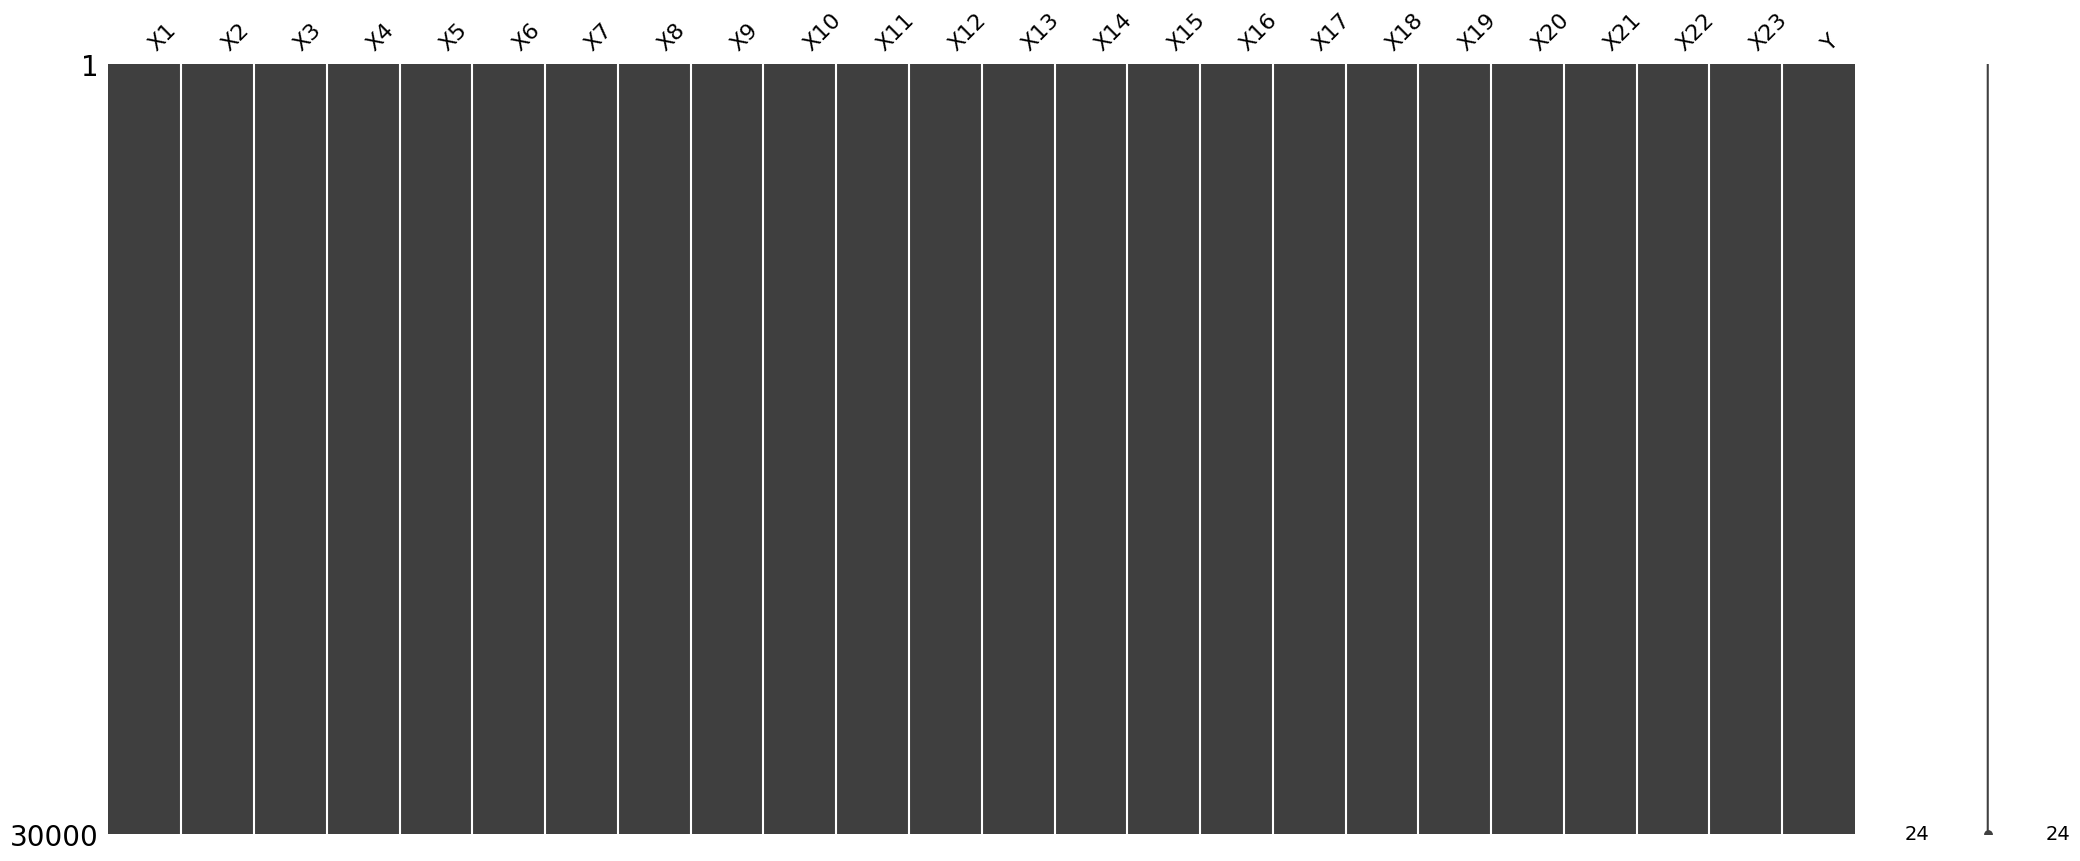

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')


In [ ]:
df.head()['X1']

0     20000
1    120000
2     90000
3     50000
4     50000
Name: X1, dtype: object

Text(0.5, 1.0, 'Distribution of Default Payments')

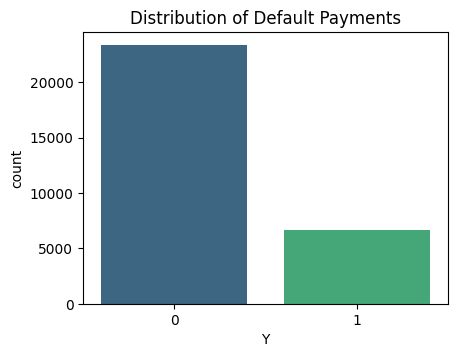

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
sns.countplot(x='Y', data=df, palette='viridis')
plt.title('Distribution of Default Payments')

In [ ]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23']
target = 'Y'

X = df[features]
y = df[target]
# print(X,y)

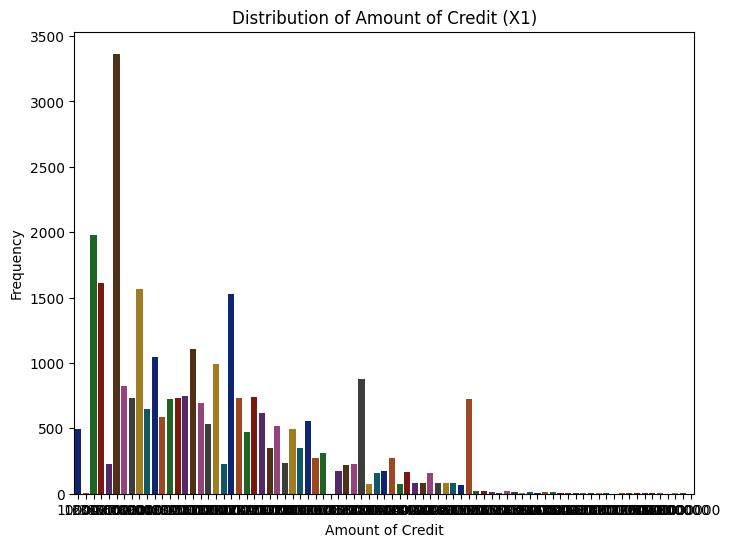

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='X1', data=df, palette='dark')
plt.title('Distribution of Amount of Credit (X1)')
plt.xlabel('Amount of Credit')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train = df['Y']
le = LabelEncoder()
df['Y'] = le.fit_transform(df['Y'])
df['Y'] = df['Y'].astype(float)

In [ ]:
print(df['Y'].dtype)

float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

In [ ]:
model = LogisticRegression(random_state=42)

In [ ]:
print(y_train.unique())

[0 1]


In [ ]:
print(y_train.isnull().sum())

0


In [ ]:
y_train = y_train.astype(float)

In [ ]:
y_train.dtype

dtype('float64')

In [ ]:
print(y_train.value_counts())

0.0    18677
1.0     5323
Name: Y, dtype: int64


In [ ]:
# print(X_train_scaled.value_counts())

In [ ]:
print(X_train_scaled.dtype)

float64


In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train.replace('unknown', -1, inplace=True)
y_test.replace('unknown', -1, inplace=True)

In [ ]:
print(y_train.unique())
print(y_test.unique())

[0. 1.]
[0 1]


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.81

Confusion Matrix:
[[4549  138]
 [1003  310]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Random Forest Classifier

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.818

In [ ]:
confusion_matrix(y_test, y_pred)

array([[4427,  260],
       [ 832,  481]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
X = df.iloc[:, 0:23]
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
y = df['Y'].values.flatten()
y

array([1., 1., 0., ..., 1., 1., 1.])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu', input_dim=23))
classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

In [ ]:
train_x = np.array(X_train)
train_y = np.array(y_train)

In [ ]:
classifier.fit(train_x, train_y, batch_size=10, epochs=100)

ValueError: ignored